### CNN with KFold 

In [41]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dropout
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*Tracing is expensive.*")

# Function to load images from a folder
def load_images_from_folder(folder, label, target_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename)).convert('L')  # Convert to grayscale
        if img is not None:
            img = img.resize(target_size)  # Resize the image to a fixed size
            img = np.array(img)
            images.append(img)
            labels.append(label)
    return images, labels

# Define the paths to the folders
benign_folder = 'Dataset/LungCancer/Bengin cases'
malignant_folder = 'Dataset/LungCancer/Malignant cases'
normal_folder = 'Dataset/LungCancer/Normal cases'

# Load images and labels for each category
benign_images, benign_labels = load_images_from_folder(benign_folder, 0)
malignant_images, malignant_labels = load_images_from_folder(malignant_folder, 1)
normal_images, normal_labels = load_images_from_folder(normal_folder, 2)

# Concatenate the images and labels from all categories
images = np.concatenate([benign_images, malignant_images, normal_images], axis=0)
labels = np.concatenate([benign_labels, malignant_labels, normal_labels], axis=0)

# Normalize the pixel values to range [0, 1] 
# Normalizing pixel values ensures that all input features (pixels) are on a similar scale. 
images = images / 255.0

# Reshape the input data to fit the CNN input shape (assuming grayscale images)
height, width = images[0].shape
images = images.reshape((-1, height, width, 1))

# Define the number of folds
n_splits = 8

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

train_accuracy = []
train_loss = []
val_accuracy = []
val_loss = []

# Initialize lists to store true and predicted labels for all folds
all_true_labels = []
all_predicted_labels = []

# Iterate over the splits
for fold, (train_index, test_index) in enumerate(kf.split(images)):
    print(f"Fold {fold+1}/{n_splits}")

    # Split the dataset into training and testing sets for this fold
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Define the CNN model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        Dropout(0.2),  # Add dropout with a rate of 0.2 (20% dropout)
        layers.Dense(3, activation='softmax')  # 3 classes: benign, malignant, normal
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=0)

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test)

    # Make predictions
    predictions_prob = model.predict(X_test)
    predictions = np.argmax(predictions_prob, axis=1)

    # Append true and predicted labels for this fold
    all_true_labels.extend(y_test)
    all_predicted_labels.extend(predictions)
    
    train_accuracy.append(history.history['accuracy'])
    train_loss.append(history.history['loss'])
    val_accuracy.append(history.history['val_accuracy'])
    val_loss.append(history.history['val_loss'])

print(" ")
print("Accuracy of the model is - " ,test_accuracy *100, "%")


Fold 1/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9565 - loss: 0.1566
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Fold 2/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8510 - loss: 0.3049
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Fold 3/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9830 - loss: 0.0634
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Fold 4/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9697 - loss: 0.0888
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Fold 5/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9654 - loss: 0.1856
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Fold 6/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9786 - loss: 0.1077
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Fold 7/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9908 - loss: 0.0466
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Fold 8/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9846 - loss: 0.0579
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
 
Accuracy of the model is -  97.0802903175354 %

### DISTRIBUTION OF IMAGE CATEGORIES

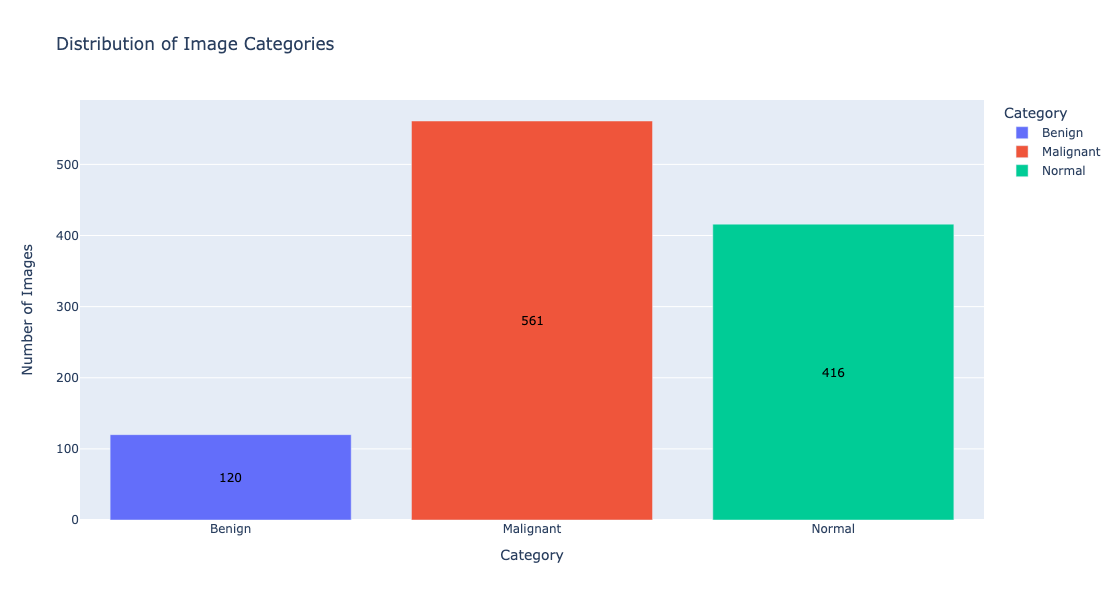

In [43]:
import plotly.express as px

# Count the number of images in each category
categories = ['Benign', 'Malignant', 'Normal']
category_counts = [len(benign_images), len(malignant_images), len(normal_images)]

# Create a DataFrame
data = {'Category': categories, 'Number of Images': category_counts}

# Create a bar plot using Plotly Express
fig = px.bar(data, x='Category', y='Number of Images', color='Category',
             labels={'Number of Images': 'Number of Images'}, 
             title='Distribution of Image Categories')

# Update y-axis ticks
fig.update_yaxes(tickvals=list(range(0, max(category_counts) + 1, 100)), dtick=100)

# Annotate each bar with its count at the middle of the bars
for i, count in enumerate(category_counts):
    fig.add_annotation(x=categories[i], y=count/2, text=str(count),
                       font=dict(size=12, color='black'), showarrow=False)

# Update plot layout to increase size
fig.update_layout(height=600, width=800)

fig.show()


### IMAGES OF EACH CATEGORY

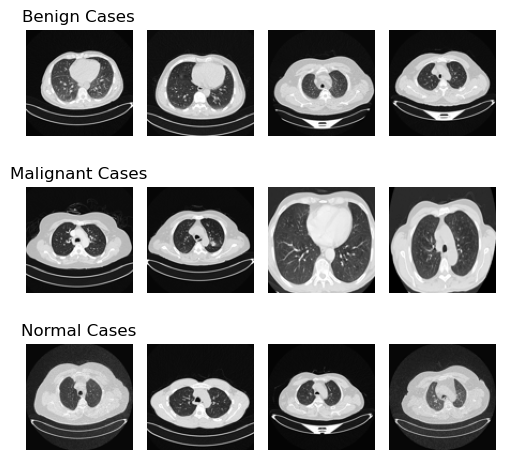

In [44]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Function to display random images from each category
def display_random_images(images, labels, categories, num_images=4):
    fig, axes = plt.subplots(len(categories), num_images, figsize=(5, 5))

    for i, category in enumerate(categories):
        category_images = [img for img, label in zip(images, labels) if label == i]
        random_images = random.sample(category_images, num_images)

        # Display the category label only once
        axes[i, 0].set_title(category + " Cases")
        
        for j, img in enumerate(random_images):
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Display random images from each category
display_random_images(images, labels, ['Benign', 'Malignant', 'Normal'])


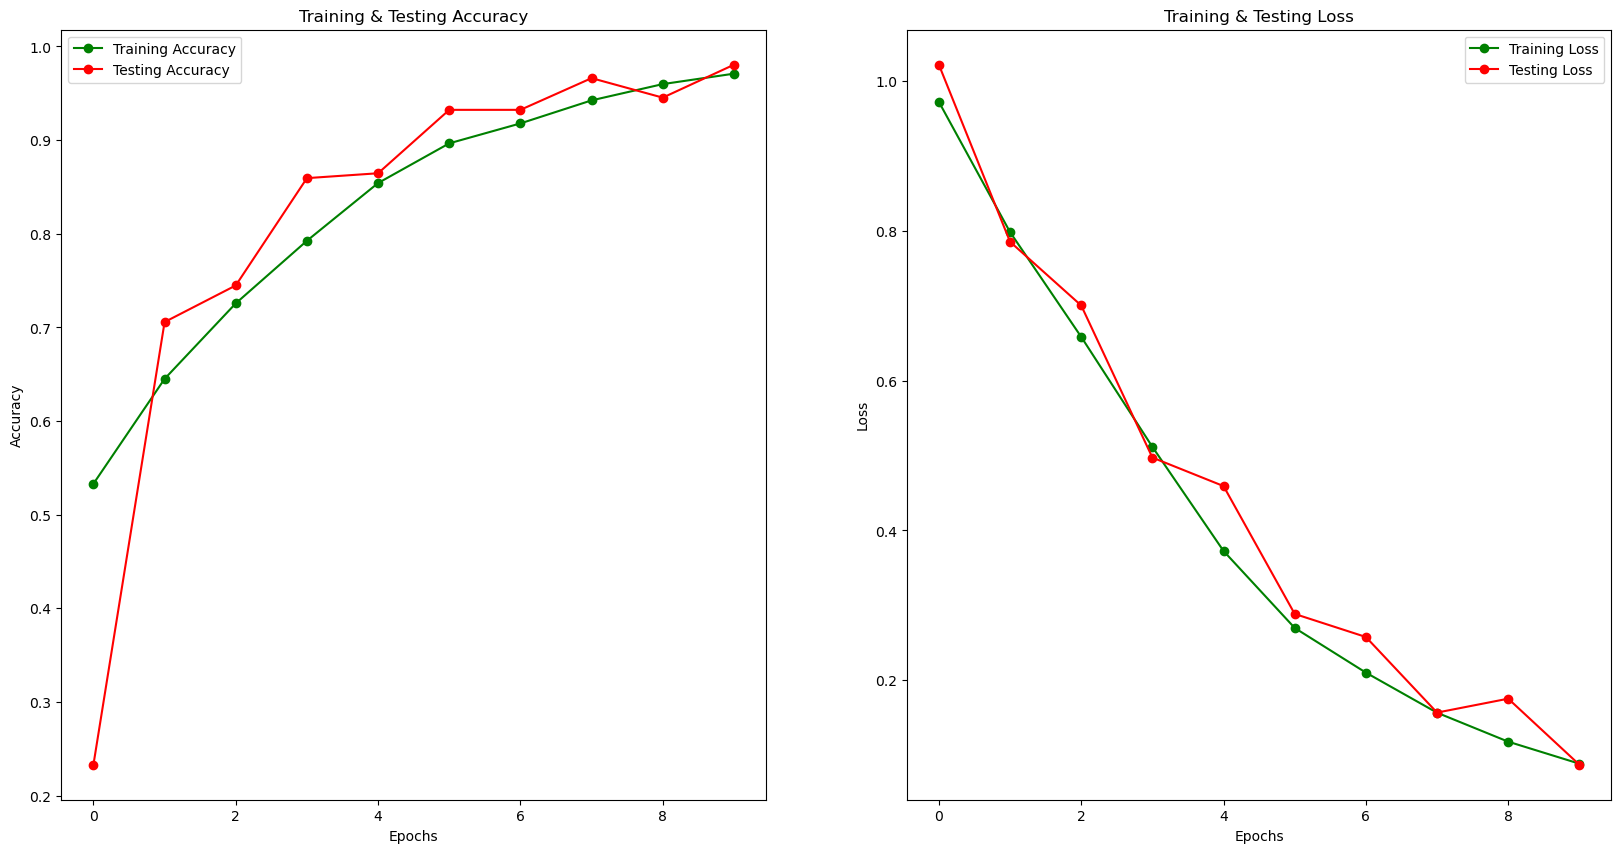

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
epochs = range(10)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

# Plot training and validation accuracy
ax[0].plot(epochs, np.mean(train_accuracy, axis=0), 'go-', label='Training Accuracy')
ax[0].plot(epochs, np.mean(val_accuracy, axis=0), 'ro-', label='Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# Plot training and validation loss
ax[1].plot(epochs, np.mean(train_loss, axis=0), 'g-o', label='Training Loss')
ax[1].plot(epochs, np.mean(val_loss, axis=0), 'r-o', label='Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [50]:
print("Classification Report:")

target_names = ['Benign', 'Malignant', 'Normal']  # Specify the correct target names
print(classification_report(all_true_labels, all_predicted_labels, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.84      0.89       120
   Malignant       0.99      0.99      0.99       561
      Normal       0.95      0.98      0.96       416

    accuracy                           0.97      1097
   macro avg       0.96      0.94      0.95      1097
weighted avg       0.97      0.97      0.97      1097



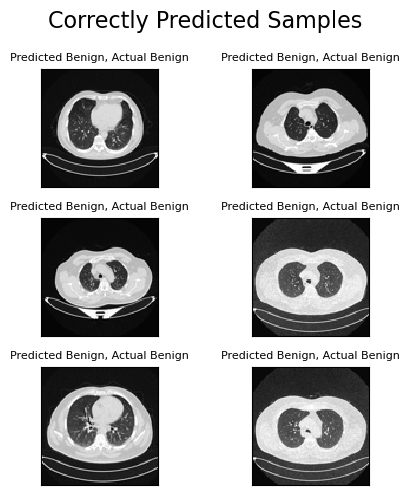

In [47]:
# Find indices of correct predictions
correct_indices = np.where(predictions == y_test)[0]

# Display correct predictions
plt.figure(figsize=(5, 5))
plt.suptitle('Correctly Predicted Samples', fontsize=16)
for i, idx in enumerate(correct_indices[:6]):
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[idx].reshape(height, width), cmap="gray", interpolation='none')
    plt.title("Predicted {}, Actual {}".format(category_names[predictions[idx]], category_names[y_test[idx]]), fontsize=8)
plt.tight_layout()
plt.show()

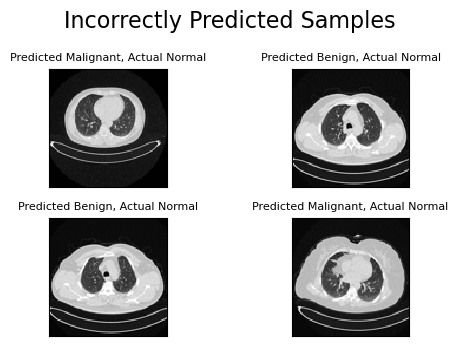

In [48]:
# Find indices of incorrect predictions
incorrect_indices = np.where(predictions != y_test)[0]

# Display incorrect predictions
plt.figure(figsize=(5, 5))
plt.suptitle('Incorrectly Predicted Samples', fontsize=16)
for i, idx in enumerate(incorrect_indices[:6]):
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[idx].reshape(height, width), cmap="gray", interpolation='none')
    plt.title("Predicted {}, Actual {}".format(category_names[predictions[idx]], category_names[y_test[idx]]), fontsize=8)
plt.tight_layout()
plt.show()


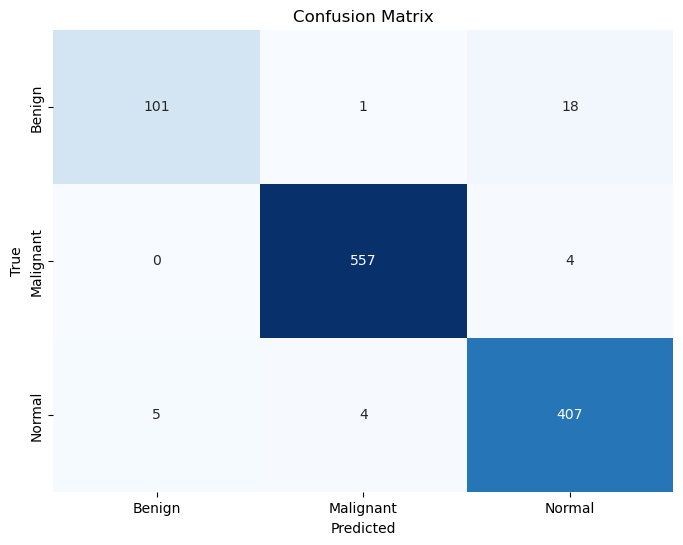

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define category names
category_names = ['Benign', 'Malignant', 'Normal']

# Convert numeric labels to category names
all_true_categories = [category_names[label] for label in all_true_labels]
all_predicted_categories = [category_names[label] for label in all_predicted_labels]

# Compute confusion matrix
cm = confusion_matrix(all_true_categories, all_predicted_categories, labels=category_names)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=category_names, yticklabels=category_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
